*아래 링크를 통해 이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.*

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/nlp-with-pytorch/blob/master/chapter_1/PyTorch_Basics.ipynb"><img src="https://jupyter.org/assets/main-logo.svg" width="28" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/nlp-with-pytorch/blob/master/chapter_1/PyTorch_Basics.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

# 샘플과 타깃의 인코딩

## TF 표현

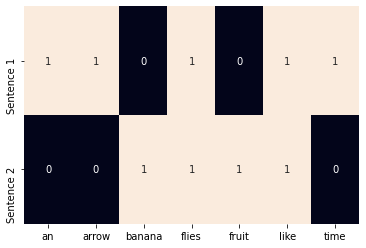

In [1]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ['Time flies like an arrow.', 
          'Fruit flies like a banana.']
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = one_hot_vectorizer.get_feature_names()
sns.heatmap(one_hot, annot=True,
            cbar=False, xticklabels=vocab,
            yticklabels=['Sentence 1', 'Sentence 2'])

# plt.savefig('1-04.png', dpi=300)
plt.show()

## TF-IDF 표현

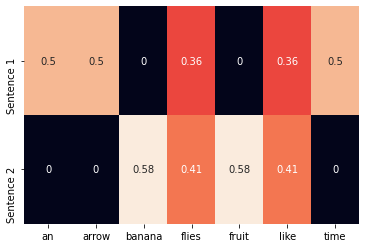

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
 
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab,
            yticklabels= ['Sentence 1', 'Sentence 2'])

# plt.savefig('1-05.png', dpi=300)
plt.show()

$IDF(w) = \text{log} \left(\dfrac{N+1}{N_w+1}\right)+1$

첫 번째 문장의 'flies'와 'like'의 경우 TF = 1이므로 $\text{TF-IDF}=1\times\text{log}\left(\dfrac{2+1}{2+1}\right)+1=1$입니다.

단어 'an', 'arrow', 'time'의 경우 $N_w=1$입니다. 따라서 $\text{TF-IDF}=1\times\text{log}\left(\dfrac{2+1}{1+1}\right)+1=1.4054651081081644$입니다.

L2 정규화를 적용하면 'flies'와 'like'는 $\dfrac{1}{\sqrt{2\times1^2+3\times1.4054651081081644^2+}}=0.3552$가 됩니다.

'an', 'arrow', 'time'는 $\dfrac{1.4054651081081644}{\sqrt{2\times1^2+3\times1.4054651081081644^2+}}=0.4992$가 됩니다.

# 파이토치 기초

In [3]:
import torch
import numpy as np
torch.manual_seed(1234)

## 텐서

* 스칼라는 하나의 숫자입니다.
* 벡터는 숫자의 배열입니다.
* 행렬은 숫자의 2-D 배열입니다.
* 텐서는 숫자의 N-D 배열입니다.

#### 텐서 만들기

크기를 지정하여 텐서를 만들 수 있습니다. 여기서는 행이 5개이고 열이 3개인 텐서를 만듭니다.

In [4]:
def describe(x):
    print("타입: {}".format(x.type()))
    print("크기: {}".format(x.shape))
    print("값: \n{}".format(x))

In [5]:
describe(torch.Tensor(2, 3))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[-1.2722e+08,  3.0663e-41,  3.7835e-44],
        [ 0.0000e+00,         nan,  3.0663e-41]])


In [6]:
describe(torch.randn(2, 3))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[ 0.0461,  0.4024, -1.0115],
        [ 0.2167, -0.6123,  0.5036]])


특정 크기의 랜덤한 텐서를 만드느 것이 일반적입니다.

In [7]:
x = torch.rand(2, 3)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0.7749, 0.8208, 0.2793],
        [0.6817, 0.2837, 0.6567]])


1이나 0으로 채워진 텐서를 만들 수도 있습니다.

In [8]:
describe(torch.zeros(2, 3))
x = torch.ones(2, 3)
describe(x)
x.fill_(5)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[5., 5., 5.],
        [5., 5., 5.]])


텐서를 초기화한 후 값을 바꿀 수 있습니다.

노트: 밑줄 문자(`_`)로 끝나는 연산은 인-플레이스 연산입니다.

In [9]:
x = torch.Tensor(3,4).fill_(5)
print(x.type())
print(x.shape)
print(x)

torch.FloatTensor
torch.Size([3, 4])
tensor([[5., 5., 5., 5.],
        [5., 5., 5., 5.],
        [5., 5., 5., 5.]])


리스트의 리스트로 텐서를 만들 수 있습니다.

In [10]:
x = torch.Tensor([[1, 2,],  
                  [2, 4,]])
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[1., 2.],
        [2., 4.]])


넘파이 배열로 텐서를 만들 수 있습니다.

In [11]:
npy = np.random.rand(2, 3)
describe(torch.from_numpy(npy))
print(npy.dtype)

타입: torch.DoubleTensor
크기: torch.Size([2, 3])
값: 
tensor([[0.5603, 0.3505, 0.5762],
        [0.5849, 0.7525, 0.9362]], dtype=torch.float64)
float64


#### 텐서 타입

The FloatTensor has been the default tensor that we have been creating all along

In [12]:
import torch
x = torch.arange(6).view(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [13]:
x = torch.FloatTensor([[1, 2, 3],  
                       [4, 5, 6]])
describe(x)

x = x.long()
describe(x)

x = torch.tensor([[1, 2, 3], 
                  [4, 5, 6]], dtype=torch.int64)
describe(x)

x = x.float() 
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6]])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [14]:
x = torch.randn(2, 3)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[ 1.5385, -0.9757,  1.5769],
        [ 0.3840, -0.6039, -0.5240]])


In [15]:
describe(torch.add(x, x))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[ 3.0771, -1.9515,  3.1539],
        [ 0.7680, -1.2077, -1.0479]])


In [16]:
describe(x + x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[ 3.0771, -1.9515,  3.1539],
        [ 0.7680, -1.2077, -1.0479]])


In [17]:
x = torch.arange(6)
describe(x)

타입: torch.LongTensor
크기: torch.Size([6])
값: 
tensor([0, 1, 2, 3, 4, 5])


In [18]:
x = x.view(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [19]:
describe(torch.sum(x, dim=0))
describe(torch.sum(x, dim=1))

타입: torch.LongTensor
크기: torch.Size([3])
값: 
tensor([3, 5, 7])
타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([ 3, 12])


In [20]:
describe(torch.transpose(x, 0, 1))

타입: torch.LongTensor
크기: torch.Size([3, 2])
값: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [21]:
import torch
x = torch.arange(6).view(2, 3)
describe(x)
describe(x[:1, :2])
describe(x[0, 1])

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([1, 2])
값: 
tensor([[0, 1]])
타입: torch.LongTensor
크기: torch.Size([])
값: 
1


In [22]:
indices = torch.LongTensor([0, 2])
describe(torch.index_select(x, dim=1, index=indices))

타입: torch.LongTensor
크기: torch.Size([2, 2])
값: 
tensor([[0, 2],
        [3, 5]])


In [23]:
indices = torch.LongTensor([0, 0])
describe(torch.index_select(x, dim=0, index=indices))

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [0, 1, 2]])


In [24]:
row_indices = torch.arange(2).long()
col_indices = torch.LongTensor([0, 1])
describe(x[row_indices, col_indices])

타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([0, 4])


인덱싱 연산에는 넘파이 `int64` 타입에 해당하는 LongTensor가 사용됩니다.

In [25]:
x = torch.LongTensor([[1, 2, 3],  
                      [4, 5, 6],
                      [7, 8, 9]])
describe(x)
print(x.dtype)
print(x.numpy().dtype)

타입: torch.LongTensor
크기: torch.Size([3, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
torch.int64
int64


FloatTensor를 LongTensor로 바꿀 수 있습니다.

In [26]:
x = torch.FloatTensor([[1, 2, 3],  
                       [4, 5, 6],
                       [7, 8, 9]])
x = x.long()
describe(x)

타입: torch.LongTensor
크기: torch.Size([3, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


### 특별한 텐서 초기화

숫자가 증가되는 벡터를 만들 수 있습니다.

In [27]:
x = torch.arange(0, 10)
print(x)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


이따금 인덱싱을 위해 정수 기반의 배열이 필요합니다.

In [28]:
x = torch.arange(0, 10).long()
print(x)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


## 연산

텐서로 선형 대수 계산을 하는 것은 최신 딥러닝 기술의 기초가 되었습니다.

파이토치의 `view` 메서드를 사용하면 원소의 순서를 유지하면서 텐서의 차원을 자유롭게 바꿀 수 있습니다.

In [29]:
x = torch.arange(0, 20)

print(x.view(1, 20))
print(x.view(2, 10))
print(x.view(4, 5))
print(x.view(5, 4))
print(x.view(10, 2))
print(x.view(20, 1))

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19]])
tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])
tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17],
        [18, 19]])
tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19]])


뷰를 사용하여 크기가 1인 차원을 추가할 수 있습니다. 이렇게 하면 다른 텐서와 연산할 때 브로드캐스팅을 활용할 수 있습니다.

In [30]:
x = torch.arange(12).view(3, 4)
y = torch.arange(4).view(1, 4)
z = torch.arange(3).view(3, 1)

print(x)
print(y)
print(z)
print(x + y)
print(x + z)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[0, 1, 2, 3]])
tensor([[0],
        [1],
        [2]])
tensor([[ 0,  2,  4,  6],
        [ 4,  6,  8, 10],
        [ 8, 10, 12, 14]])
tensor([[ 0,  1,  2,  3],
        [ 5,  6,  7,  8],
        [10, 11, 12, 13]])


`unsqueeze`와 `squeeze`는 크기가 1인 차원을 추가하고 삭제합니다.

In [31]:
x = torch.arange(12).view(3, 4)
print(x.shape)

x = x.unsqueeze(dim=1)
print(x.shape)

x = x.squeeze()
print(x.shape)

torch.Size([3, 4])
torch.Size([3, 1, 4])
torch.Size([3, 4])


표준 수학 연산을 모두 지원합니다(예를 들어 `add`).

In [32]:
x = torch.rand(3,4)
print("x: \n", x)
print("--")
print("torch.add(x, x): \n", torch.add(x, x))
print("--")
print("x+x: \n", x + x)

x: 
 tensor([[0.6662, 0.3343, 0.7893, 0.3216],
        [0.5247, 0.6688, 0.8436, 0.4265],
        [0.9561, 0.0770, 0.4108, 0.0014]])
--
torch.add(x, x): 
 tensor([[1.3324, 0.6686, 1.5786, 0.6433],
        [1.0494, 1.3377, 1.6872, 0.8530],
        [1.9123, 0.1540, 0.8216, 0.0028]])
--
x+x: 
 tensor([[1.3324, 0.6686, 1.5786, 0.6433],
        [1.0494, 1.3377, 1.6872, 0.8530],
        [1.9123, 0.1540, 0.8216, 0.0028]])


메서드 이름 끝에 `_` 문자가 있으면 인-플레이스(in-place) 연산을 의미합니다.

In [33]:
x = torch.arange(12).reshape(3, 4)
print(x)
print(x.add_(x))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  2,  4,  6],
        [ 8, 10, 12, 14],
        [16, 18, 20, 22]])


차원을 줄이는 연산이 많이 있습니다. 예를 들면 `sum`입니다.

In [34]:
x = torch.arange(12).reshape(3, 4)
print("x: \n", x)
print("---")
print("행을 따라 덧셈 (dim=0): \n", x.sum(dim=0))
print("---")
print("열을 따라 덧셈 (dim=1): \n", x.sum(dim=1))

x: 
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
---
행을 따라 덧셈 (dim=0): 
 tensor([12, 15, 18, 21])
---
열을 따라 덧셈 (dim=1): 
 tensor([ 6, 22, 38])


#### 인덱싱, 슬라이싱, 연결, 수정

In [35]:
x = torch.arange(6).view(2, 3)
print("x: \n", x)
print("---")
print("x[:2, :2]: \n", x[:2, :2])
print("---")
print("x[0][1]: \n", x[0][1])
print("---")
print("[0][1]에 8을 할당")
x[0][1] = 8
print(x)

x: 
 tensor([[0, 1, 2],
        [3, 4, 5]])
---
x[:2, :2]: 
 tensor([[0, 1],
        [3, 4]])
---
x[0][1]: 
 tensor(1)
---
[0][1]에 8을 할당
tensor([[0, 8, 2],
        [3, 4, 5]])


`index_select`을 사용해 텐서의 원소를 선택할 수 있습니다.

In [36]:
x = torch.arange(9).view(3,3)
print(x)

print("---")
indices = torch.LongTensor([0, 2])
print(torch.index_select(x, dim=0, index=indices))

print("---")
indices = torch.LongTensor([0, 2])
print(torch.index_select(x, dim=1, index=indices))

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
---
tensor([[0, 1, 2],
        [6, 7, 8]])
---
tensor([[0, 2],
        [3, 5],
        [6, 8]])


넘파이 스타일의 인덱싱도 사용할 수 있습니다.

In [37]:
x = torch.arange(9).view(3,3)
indices = torch.LongTensor([0, 2])

print(x[indices])
print("---")
print(x[indices, :])
print("---")
print(x[:, indices])

tensor([[0, 1, 2],
        [6, 7, 8]])
---
tensor([[0, 1, 2],
        [6, 7, 8]])
---
tensor([[0, 2],
        [3, 5],
        [6, 8]])


텐서를 연결할 수 있습니다. 먼저 행을 따라 열결합니다.

In [38]:
x = torch.arange(6).view(2,3)
describe(x)
describe(torch.cat([x, x], dim=0))
describe(torch.cat([x, x], dim=1))
describe(torch.stack([x, x]))

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([4, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([2, 6])
값: 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([2, 2, 3])
값: 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


열을 따라 연결할 수 있습니다.

In [39]:
x = torch.arange(9).view(3,3)

print(x)
print("---")
new_x = torch.cat([x, x, x], dim=1)
print(new_x.shape)
print(new_x)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
---
torch.Size([3, 9])
tensor([[0, 1, 2, 0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5, 3, 4, 5],
        [6, 7, 8, 6, 7, 8, 6, 7, 8]])


텐서를 쌓아 새로운 0번째 차원에 연결할 수 있습니다.

In [40]:
x = torch.arange(9).view(3,3)
print(x)
print("---")
new_x = torch.stack([x, x, x])
print(new_x.shape)
print(new_x)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
---
torch.Size([3, 3, 3])
tensor([[[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]],

        [[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]],

        [[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]])


#### 선형 대수 텐서 함수

전치는 다른 축의 차원을 서로 바꿉니다. 예를 들어 행과 열을 바꿀 수 있습니다.

In [41]:
x = torch.arange(0, 12).view(3,4)
print("x: \n", x) 
print("---")
print("x.tranpose(1, 0): \n", x.transpose(1, 0))

x: 
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
---
x.tranpose(1, 0): 
 tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])


3차원 텐서는 시퀀스의 배치로 표현됩니다. 시퀀스에 있는 각 아이템은 하나의 특성 벡터를 가집니다. 시퀀스 모델에서 시퀀스를 쉽게 인덱싱하기 위해 배치 차원과 시퀀스 차원을 바꾸는 일이 종종 있습니다.

노트: 전치는 2개의 축을 바꿉니다. `permute`는 여러 축을 다룰 수 있습니다(다음 셀에서 설명합니다).

In [42]:
batch_size = 3
seq_size = 4
feature_size = 5

x = torch.arange(batch_size * seq_size * feature_size).view(batch_size, seq_size, feature_size)

print("x.shape: \n", x.shape)
print("x: \n", x)
print("-----")

print("x.transpose(1, 0).shape: \n", x.transpose(1, 0).shape)
print("x.transpose(1, 0): \n", x.transpose(1, 0))

x.shape: 
 torch.Size([3, 4, 5])
x: 
 tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49],
         [50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59]]])
-----
x.transpose(1, 0).shape: 
 torch.Size([4, 3, 5])
x.transpose(1, 0): 
 tensor([[[ 0,  1,  2,  3,  4],
         [20, 21, 22, 23, 24],
         [40, 41, 42, 43, 44]],

        [[ 5,  6,  7,  8,  9],
         [25, 26, 27, 28, 29],
         [45, 46, 47, 48, 49]],

        [[10, 11, 12, 13, 14],
         [30, 31, 32, 33, 34],
         [50, 51, 52, 53, 54]],

        [[15, 16, 17, 18, 19],
         [35, 36, 37, 38, 39],
         [55, 56, 57, 58, 59]]])


`permute`는 전치의 일반화된 버전입니다.

In [43]:
batch_size = 3
seq_size = 4
feature_size = 5

x = torch.arange(batch_size * seq_size * feature_size).view(batch_size, seq_size, feature_size)

print("x.shape: \n", x.shape)
print("x: \n", x)
print("-----")

print("x.permute(1, 0, 2).shape: \n", x.permute(1, 0, 2).shape)
print("x.permute(1, 0, 2): \n", x.permute(1, 0, 2))

x.shape: 
 torch.Size([3, 4, 5])
x: 
 tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49],
         [50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59]]])
-----
x.permute(1, 0, 2).shape: 
 torch.Size([4, 3, 5])
x.permute(1, 0, 2): 
 tensor([[[ 0,  1,  2,  3,  4],
         [20, 21, 22, 23, 24],
         [40, 41, 42, 43, 44]],

        [[ 5,  6,  7,  8,  9],
         [25, 26, 27, 28, 29],
         [45, 46, 47, 48, 49]],

        [[10, 11, 12, 13, 14],
         [30, 31, 32, 33, 34],
         [50, 51, 52, 53, 54]],

        [[15, 16, 17, 18, 19],
         [35, 36, 37, 38, 39],
         [55, 56, 57, 58, 59]]])


행렬 곱셈은 `mm`입니다.

In [44]:
torch.randn(2, 3, requires_grad=True)

tensor([[-0.4790,  0.8539, -0.2285],
        [ 0.3081,  1.1171,  0.1585]], requires_grad=True)

In [45]:
x1 = torch.arange(6).view(2, 3).float()
describe(x1)

x2 = torch.ones(3, 2)
x2[:, 1] += 1
describe(x2)

describe(torch.mm(x1, x2))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0., 1., 2.],
        [3., 4., 5.]])
타입: torch.FloatTensor
크기: torch.Size([3, 2])
값: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])
타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[ 3.,  6.],
        [12., 24.]])


In [46]:
x = torch.arange(0, 12).view(3,4).float()
print(x)

x2 = torch.ones(4, 2)
x2[:, 1] += 1
print(x2)

print(x.mm(x2))

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([[1., 2.],
        [1., 2.],
        [1., 2.],
        [1., 2.]])
tensor([[ 6., 12.],
        [22., 44.],
        [38., 76.]])


더 자세한 내용은 [파이토치 수학 연산 문서](https://pytorch.org/docs/stable/torch.html#math-operations)를 참고하세요!

## 그레이디언트 계산

In [47]:
x = torch.tensor([[2.0, 3.0]], requires_grad=True)
z = 3 * x
print(z)

tensor([[6., 9.]], grad_fn=<MulBackward0>)


아래 간단한 코드에서 그레이디언트 계산을 엿볼 수 있습니다. 텐서 하나를 만들고 3을 곱합니다. 그다음 `sum()`을 사용해 스칼라 출력을 만듭니다. 손실 함수에는 스칼라 값이 필요하기 때문입니다. 그다음 손실에 `backward()`를 호출해 입력에 대한 변화율을 계산합니다. `sum()`으로 스칼라 값을 만들었기 때문에 `z`와 `x`에 있는 각 원소는 손실 스칼라 값에 대해 독립적입니다.

출력에 대한 `x`의 변화율은 `x`에 곱한 상수 3입니다.

In [48]:
x = torch.tensor([[2.0, 3.0]], requires_grad=True)
print("x: \n", x)
print("---")
z = 3 * x
print("z = 3*x: \n", z)
print("---")

loss = z.sum()
print("loss = z.sum(): \n", loss)
print("---")

loss.backward()

print("loss.backward()를 호출한 후, x.grad: \n", x.grad)


x: 
 tensor([[2., 3.]], requires_grad=True)
---
z = 3*x: 
 tensor([[6., 9.]], grad_fn=<MulBackward0>)
---
loss = z.sum(): 
 tensor(15., grad_fn=<SumBackward0>)
---
loss.backward()를 호출한 후, x.grad: 
 tensor([[3., 3.]])


### 예제: 조건 그레이디언트 계산하기

$$ \text{x=1에서 f(x)의 그레이디언트 찾기} $$
$$ {} $$
$$ f(x)=\left\{
\begin{array}{ll}
    sin(x) \; x>0 \text{ 일 때 }\\
    cos(x) \text{ 그 외 } \\
\end{array}
\right.$$

In [49]:
def f(x):
    if (x.data > 0).all():
        return torch.sin(x)
    else:
        return torch.cos(x)

In [50]:
x = torch.tensor([1.0], requires_grad=True)
y = f(x)
y.backward()
print(x.grad)

tensor([0.5403])


큰 벡터에 적용할 수 있지만 출력은 스칼라 값이어야 합니다.

In [51]:
x = torch.tensor([1.0, 0.5], requires_grad=True)
y = f(x)
# 에러가 발생합니다!
y.backward()
print(x.grad)

RuntimeError: ignored

스칼라 출력을 만들어 보죠.

In [52]:
x = torch.tensor([1.0, 0.5], requires_grad=True)
y = f(x)
y.sum().backward()
print(x.grad)

tensor([0.5403, 0.8776])


하지만 이슈가 있습니다. 이 함수는 예외적인 경우에 맞지 않습니다.

In [53]:
x = torch.tensor([1.0, -1], requires_grad=True)
y = f(x)
y.sum().backward()
print(x.grad)

tensor([-0.8415,  0.8415])


In [54]:
x = torch.tensor([-0.5, -1], requires_grad=True)
y = f(x)
y.sum().backward()
print(x.grad)

tensor([0.4794, 0.8415])


이는 원소별로 불리언 연산과 코사인/사인 계산이 수행되지 않기 때문입니다. 이를 해결하기 위해 자주 사용되는 방법은 마스킹입니다.

In [55]:
def f2(x):
    mask = torch.gt(x, 0).float()
    return mask * torch.sin(x) + (1 - mask) * torch.cos(x)

x = torch.tensor([1.0, -1], requires_grad=True)
y = f2(x)
y.sum().backward()
print(x.grad)

tensor([0.5403, 0.8415])


In [56]:
def describe_grad(x):
    if x.grad is None:
        print("그레이디언트 정보 없음")
    else:
        print("그레이디언트: \n{}".format(x.grad))
        print("그레이디언트 함수: {}".format(x.grad_fn))

In [57]:
import torch
x = torch.ones(2, 2, requires_grad=True)
describe(x)
describe_grad(x)
print("--------")

y = (x + 2) * (x + 5) + 3
describe(y)
z = y.mean()
describe(z)
describe_grad(x)
print("--------")
z.backward(create_graph=True, retain_graph=True)
describe_grad(x)
print("--------")


타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
그레이디언트 정보 없음
--------
타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
타입: torch.FloatTensor
크기: torch.Size([])
값: 
21.0
그레이디언트 정보 없음
--------
그레이디언트: 
tensor([[2.2500, 2.2500],
        [2.2500, 2.2500]], grad_fn=<CopyBackwards>)
그레이디언트 함수: None
--------


In [58]:
x = torch.ones(2, 2, requires_grad=True)

In [59]:
y = x + 2

In [60]:
y.grad_fn

### CUDA 텐서

파이토치 연산은 GPU나 CPU에서 수행할 수 있습니다. 두 장치를 사용하기 위한 몇 가지 연산을 제공합니다. (코랩에서 실행할 경우 런타임 유형을 GPU로 바꾸세요)

In [61]:
print(torch.cuda.is_available())

True


In [62]:
x = torch.rand(3,3)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([3, 3])
값: 
tensor([[0.9149, 0.3993, 0.1100],
        [0.2541, 0.4333, 0.4451],
        [0.4966, 0.7865, 0.6604]])


In [63]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [64]:
x = torch.rand(3, 3).to(device)
describe(x)
print(x.device)

타입: torch.cuda.FloatTensor
크기: torch.Size([3, 3])
값: 
tensor([[0.1303, 0.3498, 0.3824],
        [0.8043, 0.3186, 0.2908],
        [0.4196, 0.3728, 0.3769]], device='cuda:0')
cuda:0


In [65]:
cpu_device = torch.device("cpu")

In [66]:
# 에러 발생!
y = torch.rand(3, 3)
x + y

RuntimeError: ignored

In [67]:
y = y.to(cpu_device)
x = x.to(cpu_device)
x + y

tensor([[0.1411, 1.2953, 1.1485],
        [1.0677, 0.5066, 0.8082],
        [1.2045, 0.5140, 0.6881]])

In [68]:
if torch.cuda.is_available(): # GPU가 있을 경우에
    a = torch.rand(3,3).to(device='cuda:0') #  CUDA 텐서
    print(a)
    
    b = torch.rand(3,3).cuda()
    print(b)

    print(a + b)

    a = a.cpu() # 에러 발생
    print(a + b)

tensor([[0.7091, 0.1775, 0.4443],
        [0.1230, 0.9638, 0.7695],
        [0.0378, 0.2239, 0.6772]], device='cuda:0')
tensor([[0.5274, 0.6325, 0.0910],
        [0.2323, 0.7269, 0.1187],
        [0.3951, 0.7199, 0.7595]], device='cuda:0')
tensor([[1.2365, 0.8100, 0.5353],
        [0.3552, 1.6906, 0.8883],
        [0.4330, 0.9438, 1.4367]], device='cuda:0')


RuntimeError: ignored

### 연습문제

연습문제에 필요한 일부 연산은 이 노트북에 있지 않습니다. [파이토치 문서](https://pytorch.org/docs/)를 참고하세요!

(정답은 맨 아래 있습니다)

#### 문제 1

2D 텐서를 만들고 차원 0 위치에 크기가 1인 차원을 추가하세요.

#### 문제 2 

이전 텐서에 추가한 차원을 삭제하세요.

#### 문제 3

[3, 7) 범위를 갖는 5x3 크기의 랜덤한 텐서를 만드세요.

#### 문제 4

정규 분포(평균=0, 표준편차=1)를 사용해 텐서를 만드세요.

#### 문제 5

텐서 `torch.Tensor([1, 1, 1, 0, 1])`에서 0이 아닌 원소의 인덱스를 추출하세요.

#### 문제 6

(3,1) 크기가 인 랜덤한 텐서를 만들고 네 벌을 복사해 쌓으세요.

#### 문제 7

두 개의 2차원 행렬(`a=torch.rand(3,4,5)`, `b=torch.rand(3,5,4)`)의 배치 행렬 곱셈(batch matrix-matrix product)을 계산하세요.

#### 문제 8

3차원 행렬(`a=torch.rand(3,4,5)`)과 2차원 행렬(`b=torch.rand(5,4)`)의 배치 행렬 곱셈을 계산하세요.

정답은 아래에..

정답은 더 아래에..

#### 문제 1

2D 텐서를 만들고 차원 0 위치에 크기가 1인 차원을 추가하세요.

In [69]:
a = torch.rand(3,3)
a = a.unsqueeze(0)
print(a)
print(a.shape)

tensor([[[0.5311, 0.6449, 0.7224],
         [0.4416, 0.3634, 0.8818],
         [0.9874, 0.7316, 0.2814]]])
torch.Size([1, 3, 3])


#### 문제 2 

이전 텐서에 추가한 차원을 삭제하세요.

In [70]:
a = a.squeeze(0)
print(a.shape)

torch.Size([3, 3])


#### 문제 3

[3, 7) 범위를 갖는 5x3 크기의 랜덤한 텐서를 만드세요.

In [71]:
3 + torch.rand(5, 3) * 4

tensor([[3.2603, 3.0260, 5.0138],
        [4.2326, 4.4967, 4.7188],
        [6.8914, 6.8958, 4.8130],
        [4.3994, 5.9713, 4.8404],
        [3.0970, 5.6519, 6.9147]])

#### 문제 4

정규 분포(평균=0, 표준편차=1)를 사용해 텐서를 만드세요.

In [72]:
a = torch.rand(3,3)
a.normal_(mean=0, std=1)

tensor([[ 0.5548, -0.0845,  0.5903],
        [-1.0032, -1.7873,  0.0538],
        [ 0.8246, -0.5723, -0.4876]])

#### 문제 5

텐서 `torch.Tensor([1, 1, 1, 0, 1])`에서 0이 아닌 원소의 인덱스를 추출하세요.

In [73]:
a = torch.Tensor([1, 1, 1, 0, 1])
torch.nonzero(a)

tensor([[0],
        [1],
        [2],
        [4]])

#### 문제 6

(3,1) 크기가 인 랜덤한 텐서를 만들고 네 벌을 복사해 쌓으세요.

In [74]:
a = torch.rand(3,1)
a.expand(3,4)

tensor([[0.6889, 0.6889, 0.6889, 0.6889],
        [0.8389, 0.8389, 0.8389, 0.8389],
        [0.1780, 0.1780, 0.1780, 0.1780]])

#### 문제 7

두 개의 2차원 행렬(`a=torch.rand(3,4,5)`, `b=torch.rand(3,5,4)`)의 배치 행렬 곱셈(batch matrix-matrix product)을 계산하세요.

In [75]:
a = torch.rand(3,4,5)
b = torch.rand(3,5,4)
torch.bmm(a, b)

tensor([[[1.8631, 0.5816, 1.6206, 2.1847],
         [1.4829, 0.6082, 1.3175, 1.5142],
         [1.0181, 0.2124, 0.7511, 1.2270],
         [1.8149, 0.4185, 1.7273, 1.9657]],

        [[0.2883, 1.4538, 0.9522, 1.3637],
         [0.6061, 0.8883, 0.5272, 1.2686],
         [0.6755, 1.3005, 0.6378, 1.5955],
         [0.3848, 1.5427, 1.0912, 1.3246]],

        [[2.0046, 2.0660, 1.6496, 1.3565],
         [2.0920, 2.0059, 1.7782, 1.5390],
         [1.8414, 2.0416, 1.3245, 1.0922],
         [1.1424, 1.4117, 0.9156, 0.6832]]])

#### 문제 8

3차원 행렬(`a=torch.rand(3,4,5)`)과 2차원 행렬(`b=torch.rand(5,4)`)의 배치 행렬 곱셈을 계산하세요.

In [76]:
a = torch.rand(3,4,5)
b = torch.rand(5,4)
torch.bmm(a, b.unsqueeze(0).expand(a.size(0), *b.size()))

tensor([[[1.7605, 2.0294, 1.5650, 0.6206],
         [1.3520, 1.8327, 1.4261, 0.8760],
         [1.5696, 2.2761, 1.9558, 0.7985],
         [1.2448, 1.3463, 1.1928, 0.5456]],

        [[1.7564, 1.8829, 1.5684, 0.7319],
         [1.7715, 2.0721, 1.6825, 0.7578],
         [1.4518, 2.1728, 1.8737, 0.8913],
         [1.3978, 1.6048, 1.3362, 0.5736]],

        [[1.7872, 2.4103, 1.9224, 0.8451],
         [1.9918, 2.5528, 1.8675, 1.0383],
         [1.7120, 2.0994, 1.5413, 0.9485],
         [1.4417, 1.9108, 1.5602, 0.7331]]])